In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def rk_step(y_n, dt, rhs, t):
    k1 = rhs(y_n, t)
    k2 = rhs(y_n+dt/2*k1, t+dt/2.)
    k3 = rhs(y_n+dt/2*k2, t+dt/2.)
    k4 = rhs(y_n+dt*k3, t+dt)
    y_np1 = y_n + dt/6 *(k1+2*k2+2*k3+k4)
    return y_np1

In [131]:
omega = np.pi*2.
omega0 = 1.5*omega
beta = omega0/4.
gamma = 1.006
def rhs(y, t): # DDP
    # y = (phi, phi_dot)
    dydt = np.array([y[1],-2*beta*y[1]-omega0**2*np.sin(y[0])+gamma*omega0**2*np.cos(omega*t)])
    return dydt

In [132]:
Nsteps = 1000*100
t = 0
dt = 2.0*np.pi/(100.0*omega0)
y = np.array([-np.pi/2.,0])
ts = np.zeros((Nsteps))
ys = np.zeros((Nsteps, len(y)))
for i in range(Nsteps):
    ys[i] = y
    ts[i] = t
    y = rk_step(y, dt, rhs, t)
    t += dt

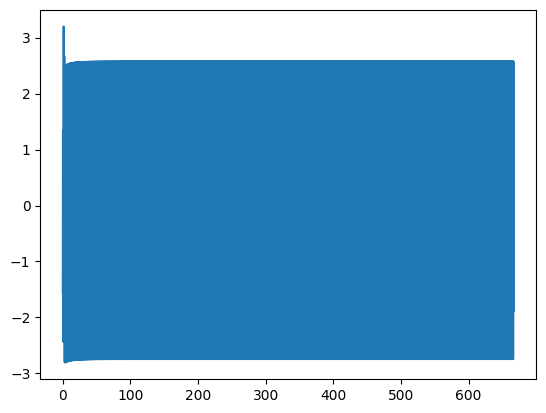

In [133]:
fig, ax = plt.subplots()
ax.plot(ts,ys[:,0]);

In [134]:
data = ys[Nsteps//2:,0]
ps = np.abs(np.fft.fft(data))**2

In [135]:
freqs = np.fft.fftfreq(data.size, dt) *2.0*np.pi
idx = np.argsort(freqs)

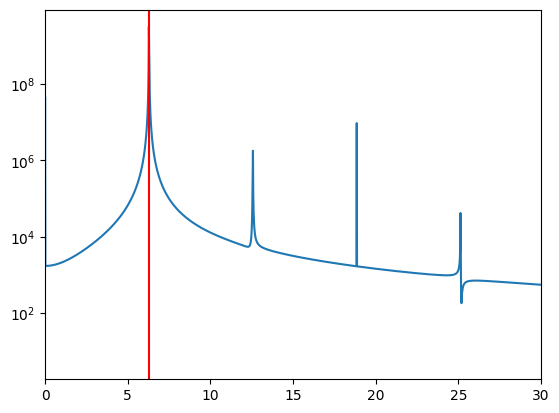

In [136]:
fig, ax = plt.subplots()
ax.plot(freqs[idx], ps[idx])
ax.set_yscale("log")
ax.set_xlim([0,30])
ax.axvline(omega, color="red")

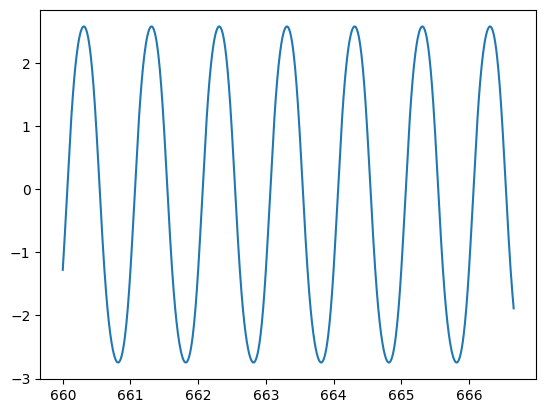

In [137]:
fig, ax = plt.subplots()
ax.plot(ts[-1000:],ys[-1000:,0]);